Uniform random variable 

$$E[X] = \int_{\alpha}^{\beta} \frac{x}{\beta-\alpha} \cdot dx = \frac{{\beta + \alpha}}{2}$$
$$E[X^2] = \int_{\alpha}^{\beta} \frac{x^2}{\beta-\alpha} \cdot dx = \frac{{\beta^3 - \alpha^2}}{3(\beta - \alpha)}$$
$$\text{Var}(X) = E[X^2] - E[X]^2 = \frac{{(\beta - \alpha)^2}}{12}$$

Uniform random variable in 2D space
$$C = \frac{1}{A}$$
The equation states that for each point in the pdf is all equal likely

In [1]:
def calculate_uniform_rv_mean_variance(a, b):
    # Calculate mean
    mean = (a + b) / 2

    # Calculate mean^2
    mean2 = (a**3 - b**2) / 3*(a - b)
    
    # Calculate variance
    variance = ((b - a) ** 2) / 12

    return mean, mean2, variance


# Example usage
lower_bound = 2
upper_bound = 1

mean, mean2, variance = calculate_uniform_rv_mean_variance(lower_bound, upper_bound)

print("Mean:", mean)
print("Mean^2:", mean2)
print("Variance:", variance)

Mean: 1.5
Mean^2: 2.3333333333333335
Variance: 0.08333333333333333


For calculation the properbility of a constinous random variable in the spectrum of a to b in a uniform CDF
$$$$
Ex: What er the probability that the temperature is between 15 and 20 degrees when i know that the min is 10 and the max is 30?

The probability (CDF) between 15 and 20 is: 0.25
The probability (PDF) between 15 and 20 is: 0.25


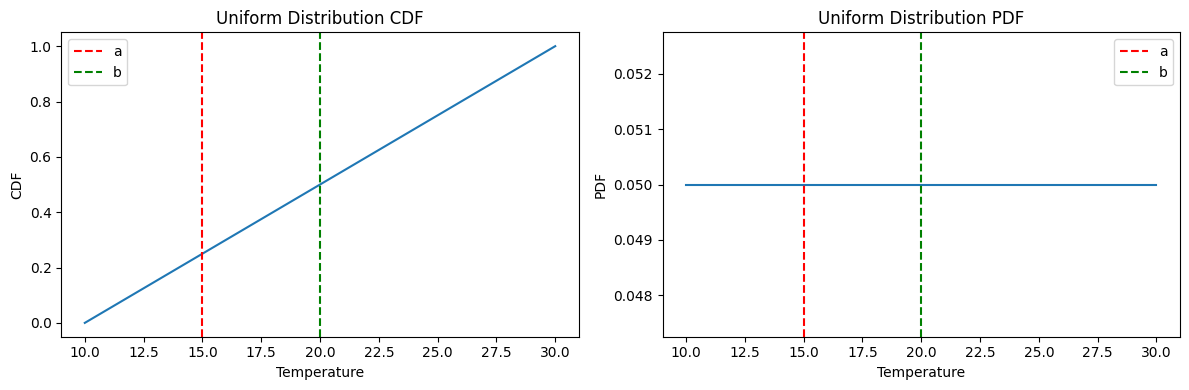

In [7]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

def calculate_probability_cdf(a, b, min_val, max_val):
    cdf_b = (b - min_val) / (max_val - min_val)
    cdf_a = (a - min_val) / (max_val - min_val)
    probability = cdf_b - cdf_a
    return probability

def calculate_probability_pdf(a, b, min_val, max_val):
    pdf_b = 1 / (max_val - min_val)
    pdf_a = 1 / (max_val - min_val)
    probability = (b - a) * (pdf_b + pdf_a) / 2
    return probability

# Example usage
a = 15  # Lower bound
b = 20  # Upper bound
min_val = 10  # Minimum 
max_val = 30  # Maximum 

probability_cdf = calculate_probability_cdf(a, b, min_val, max_val)
probability_pdf = calculate_probability_pdf(a, b, min_val, max_val)

print(f"The probability (CDF) between {a} and {b} is: {probability_cdf}")
print(f"The probability (PDF) between {a} and {b} is: {probability_pdf}")

#:::::::::
#Plots
#:::::::::

# Plotting the CDF
x_cdf = np.linspace(min_val, max_val, 1000)
y_cdf = stats.uniform.cdf(x_cdf, loc=min_val, scale=max_val-min_val)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x_cdf, y_cdf)
plt.axvline(x=a, color='r', linestyle='--', label='a')
plt.axvline(x=b, color='g', linestyle='--', label='b')
plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.title('Uniform Distribution CDF')
plt.legend()

# Plotting the PDF
x_pdf = np.linspace(min_val, max_val, 1000)
y_pdf = stats.uniform.pdf(x_pdf, loc=min_val, scale=max_val-min_val)

plt.subplot(1, 2, 2)
plt.plot(x_pdf, y_pdf)
plt.axvline(x=a, color='r', linestyle='--', label='a')
plt.axvline(x=b, color='g', linestyle='--', label='b')
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.title('Uniform Distribution PDF')
plt.legend()

plt.tight_layout()
plt.show()




In [8]:
def calculate_uniform_rv_mean_variance(a, b):
    # Calculate mean
    mean = (a + b) / 2

    # Calculate mean^2
    mean2 = (a**3 - b**2) / 3*(a - b)
    
    # Calculate variance
    variance = ((b - a) ** 2) / 12

    return mean, mean2, variance


# Example usage with temperature
lower_bound = 30 
upper_bound = 10

mean, mean2, variance = calculate_uniform_rv_mean_variance(lower_bound, upper_bound)

print("Mean:", mean)
print("Mean^2:", mean2)
print("Variance:", variance)

Mean: 20.0
Mean^2: 179333.3333333333
Variance: 33.333333333333336


For random pdf, can be difined manually for a set of values:
$$$$
When all events are not equally likely:

Integral of PDF over [-1, 1]: 0.4076685338438103


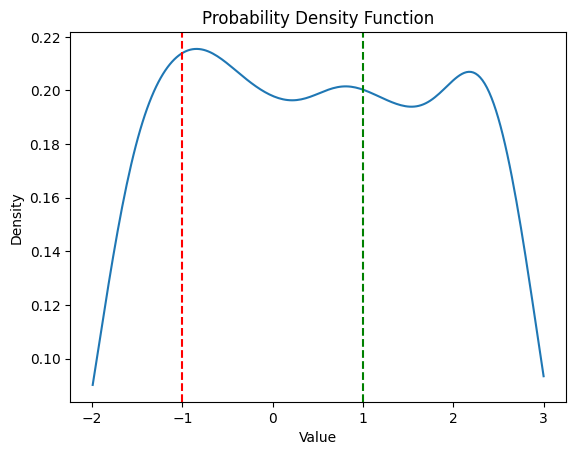

In [4]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad

def create_pdf(data):
    # Create a probability density function (PDF) of the data using kernel density estimation (KDE)
    kde = gaussian_kde(data)

    # Evaluate the PDF on a grid of points
    x_vals = np.linspace(min(data), max(data), num=200)
    y_vals = kde(x_vals)

    # Return the x and y values of the PDF
    return x_vals, y_vals

def calculate_integral(pdf, x_start, x_end, num_points=10000):
    # Define a lambda function for the PDF that takes a single argument x
    pdf_func = lambda x: np.interp(x, pdf[0], pdf[1])
    
    # Calculate the integral of the PDF over the given range using the quad function from scipy
    x_vals = np.linspace(x_start, x_end, num=num_points)
    y_vals = pdf_func(x_vals)
    dx = (x_end - x_start) / (num_points - 1)
    integral = np.sum(y_vals) * dx
    
    if integral >= 1:
        integral = 1
    
    return integral

# Generate a list of random values
data = []
for i in range(1000):
    value = random.uniform(-2, 3)
    data.append(value)

#
# Data can manually be difined as a list of values
#

# Create a probability density function (PDF) of the data
x_vals, y_vals = create_pdf(data)

# Calculate the integral of the PDF over a given range (x_start to x_end):
x_start = -1
x_end = 1
integral = calculate_integral((x_vals, y_vals), x_start, x_end)
print("Integral of PDF over [{}, {}]: {}".format(x_start, x_end, integral))

# Plot the PDF
plt.plot(x_vals, y_vals)
plt.axvline(x=x_start, color='r', linestyle='--', label='a')
plt.axvline(x=x_end, color='g', linestyle='--', label='b')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Probability Density Function')
plt.show()

Exponential random variables 

$$E[X] = \frac{1}{\lambda}$$
$$\text{Var}(X) = \frac{1}{\lambda^2} $$

For calculating mean and variance of exponential random variables

In [3]:
import numpy as np

# Sample data from an exponential distribution
data = np.random.exponential(scale=1.0, size=100)

# Data can manually be difined

# Estimate the rate parameter
rate = 1 / np.mean(data)

import numpy as np

def calculate_exponential_rv_mean_variance(rate):
    # Calculate mean
    mean = 1 / rate

    # Calculate variance
    variance = 1 / (rate ** 2)

    return mean, variance

mean, variance = calculate_exponential_rv_mean_variance(rate)

print("Mean:", mean)
print("Variance:", variance)

Mean: 0.9299556570930331
Variance: 0.8648175241593349


For poison process: $\newline$
Poisson process is useful when you encounter scenarios that involve counting the number of events occurring within a given interval or spatial region, where the events are assumed to happen independently and at a constant average rate.
$$P(k, \lambda) = \frac{{e^{-\lambda} \cdot \lambda^k}}{{k!}}$$

True average temperature: mu = 6
Sample sizes: n1 = 10 , n2 = 1000
MLEs: mu_hat1 = 5.5659818058951975 , mu_hat2 = 6.003987449651919
The 99.0% confidence interval is using Za/2 (4.7514330595932215, 6.380530552197174) when n is 10.
The 99.0% confidence interval is using Za/2 (5.922532575021721, 6.085442324282116) when n is 1000.
The 99.0% confidence interval is using Ta/2,n-1 (4.538293571889102, 6.593670039901293) when n is 10.
The 99.0% confidence interval is using Ta/2,n-1 (5.9223766641799624, 6.085598235123875) when n is 1000.
The fraction outside is 10.0% when n is 10.
The fraction outside is 93.89999999999999% when n is 1000.


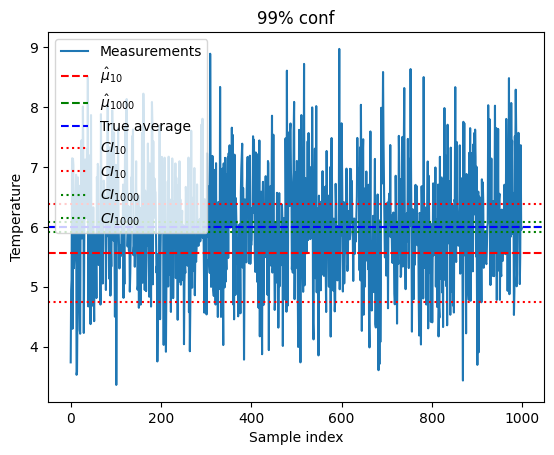

In [1]:
import numpy as np
import math
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt

# True average temperature
mu = 6

# Known variance if not know put 1 and only look at the Ta/2,n-1
sigma2 = 1

# Sample sizes
n1 = 10
n2 = 1000

#choose one of the three confidence levels also known as alpha
#standards being 0.1, 0.05, 0.01
alpha = 0.01

conf= (1 - alpha)*100
conf = str(conf)
#the z_score of the most common confidence levels is shown and used here
z_score = norm.ppf(1-alpha/2)

#sigma is the confidence interval
#offent shown as
#+-sigma
#this is the number being squred
sigma = math.sqrt(1)

# Generate a random sample of temperatures
x = mu + np.random.randn(n2)*np.sqrt(sigma2)
y = mu + np.random.randn(n1)*np.sqrt(sigma2)

# Calculate MLEs for different sample sizes
mu_hat1 = np.mean(y[:n1])
mu_hat2 = np.mean(x[:n2])

CIz1 = (mu_hat1 - z_score * sigma / math.sqrt(n1), mu_hat1 + z_score * sigma / math.sqrt(n1))
CIz2 = (mu_hat2 - z_score * sigma / math.sqrt(n2), mu_hat2 + z_score * sigma / math.sqrt(n2))

#Based on the created array and alpha the t score is calculated
t_score1 = abs(t.ppf(alpha/2, n1-1))
#Based on the array and alpha the t score is calculated
t_score2 = abs(t.ppf(alpha/2, n2-1))

#Then to Confidence interval is being calculated
CIt1 = (mu_hat1 - t_score1 * sigma / math.sqrt(n1), mu_hat1 + t_score1 * sigma / math.sqrt(n1))
#Then to Confidence interval is being calculated
CIt2 = (mu_hat2 - t_score2 * sigma / math.sqrt(n2), mu_hat2 + t_score2 * sigma / math.sqrt(n2))

# Count samples outside CIs
frac_outside1 = sum((y[:n1] < CIt1[0]) | (y[:n1] > CIt1[1])) / n1
frac_outside2 = sum((x[:n2] < CIt2[0]) | (x[:n2] > CIt2[1])) / n2

# Plot the collected measurements and the estimated MLEs
plt.plot(x, label="Measurements")
plt.axhline(y=mu_hat1, color='r', linestyle='--', label=r"$\hat{\mu}_{10}$")
plt.axhline(y=mu_hat2, color='g', linestyle='--', label=r"$\hat{\mu}_{1000}$")

plt.axhline(y=mu, color='b', linestyle='--', label="True average")

plt.axhline(y=CIz1[0], color='r', linestyle=':', label=r"$CI_{10}$")
plt.axhline(y=CIz1[1], color='r', linestyle=':', label=r"$CI_{10}$")
plt.axhline(y=CIz2[0], color='g', linestyle=':', label=r"$CI_{1000}$")
plt.axhline(y=CIz2[1], color='g', linestyle=':', label=r"$CI_{1000}$")

# Print results
print("True average temperature: mu =", mu)
print("Sample sizes: n1 =", n1, ", n2 =", n2)
print("MLEs: mu_hat1 =", mu_hat1, ", mu_hat2 =", mu_hat2)

print(f"The {conf}% confidence interval is using Za/2 {CIz1} when n is {n1}.")
print(f"The {conf}% confidence interval is using Za/2 {CIz2} when n is {n2}.")

print(f"The {conf}% confidence interval is using Ta/2,n-1 {CIt1} when n is {n1}.")
print(f"The {conf}% confidence interval is using Ta/2,n-1 {CIt2} when n is {n2}.")

print(f"The fraction outside is {frac_outside1 * 100}% when n is {n1}.")
print(f"The fraction outside is {frac_outside2 * 100}% when n is {n2}.")

plt.title("99% conf")
plt.legend()
plt.xlabel("Sample index")
plt.ylabel("Temperature")
plt.show()

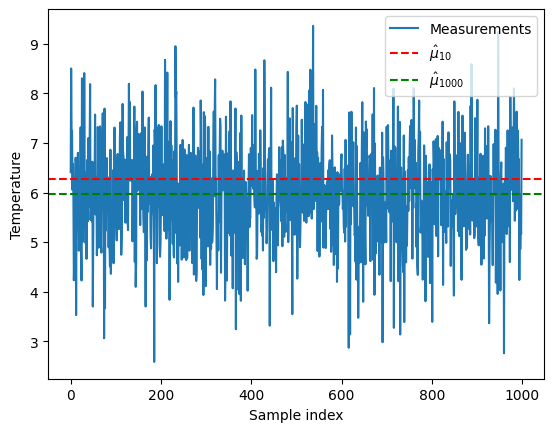

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# True average temperature
mu = 6

# Known variance
sigma2 = 1

# Sample sizes
n1 = 10
n2 = 1000

# Generate a random sample of temperatures
x = mu + np.random.randn(n2)*np.sqrt(sigma2)

# Calculate MLEs for different sample sizes
mu_hat1 = np.mean(x[:n1])
mu_hat2 = np.mean(x[:n2])

# Plot the collected measurements and the estimated MLEs
plt.plot(x, label="Measurements")
plt.axhline(y=mu_hat1, color='r', linestyle='--', label=r"$\hat{\mu}_{10}$")
plt.axhline(y=mu_hat2, color='g', linestyle='--', label=r"$\hat{\mu}_{1000}$")
plt.legend()
plt.xlabel("Sample index")
plt.ylabel("Temperature")
plt.show()


In [11]:
import math

def poisson_probability(lmbda, k):
    """
    Calculates the probability of a Poisson process.

    Parameters:
    - lmbda: The average rate of the Poisson process. How many events are expected to happend within the frame
    - k: The number of events to calculate the probability for.

    Returns:
    - The probability of k events occurring in a Poisson process with rate lmbda.
    """
    return (math.exp(-lmbda) * (lmbda ** k)) / math.factorial(k)

# Example usage:
# 5 cars are expected to cross the brigde every hour
# what is the probability that only 3 cars cross the bridge at any given hour?:
lmbda = 5  # Average rate of the Poisson process
k = 3  # Number of events

probability = poisson_probability(lmbda, k)
print(f"{probability}")

0.14037389581428056


Maximum Likelihood Estimation (MLE): 
$$\text{MLE}(\theta) = \arg\max_{\theta} \prod_{i=1}^{n} f(x_i; \theta)$$